<a href="https://colab.research.google.com/github/Shadoww002/PyTorch-Learning/blob/main/Chapter%201%20%E2%80%93%20PyTorch%20Workflow/Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn


In [102]:
## create known parameters
weight = 0.6
bias = 0.4

In [103]:
## create known data
start = 0
end = 1
step = 0.01

X = torch.arange(start ,end, step).unsqueeze(dim=1)
y = X * weight + bias

X[:6] ,y[:6]


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500]]),
 tensor([[0.4000],
         [0.4060],
         [0.4120],
         [0.4180],
         [0.4240],
         [0.4300]]))

In [104]:
len(X) , len(y)

(100, 100)

In [105]:
## Training and Testing split of data
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

len(X_train),len(X_test) , len(y_train) , len(y_test)

(80, 20, 80, 20)

In [106]:
## building a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels, c="b" , s=5 ,label="Training data")

  plt.scatter(test_data ,test_labels , c="g" , s=5 , label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data , predictions, c="r" , s=5 , label ="Predictions")

  plt.legend()

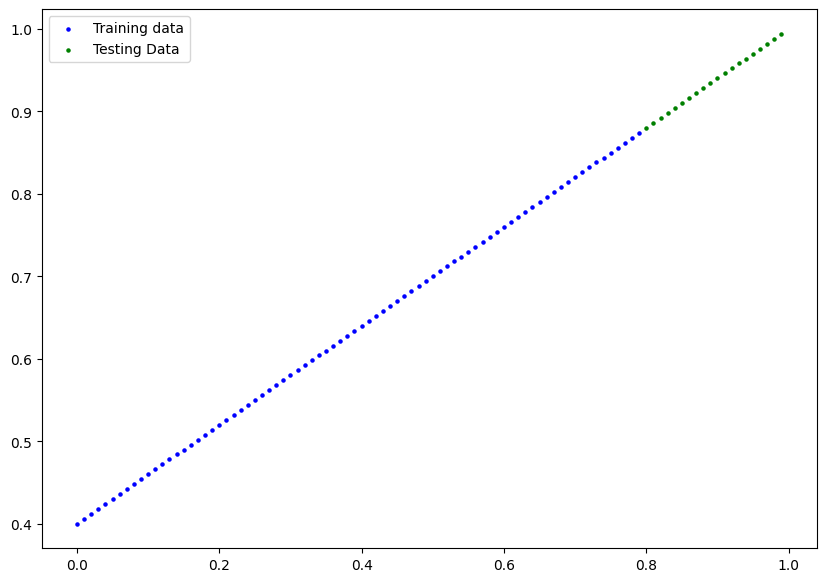

In [107]:
plot_predictions()

In [108]:
## Building First Model using PyTorch i.e Linear Regression

from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad =True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))

  def forward(self , x:torch.tensor)-> torch.Tensor :
      return self.weight * x + self.bias

In [109]:
## PyTorch Model Building Essentials

# torch.nn -> contains all of the building for computational graphs(a neural network can be considered a computational graph)
# torch.nn.parameter -> what parameter should our model try and learn ,often pytorch layer from torch.nn will set these of us
# torch.nn.Module -> The Base class for all neural network moduls
# torch.optim -> this is where optimisers in pytorch live
# def forward() -> all nn.Module subclass requires ypu to overwrite forward() , this method defines what happens in the forward computation

In [110]:
torch.manual_seed(33)

# creating an instance of the model
model_0 = LinearRegressionModel()

#checking parameters
list(model_0.parameters())

[Parameter containing:
 tensor([1.1982], requires_grad=True),
 Parameter containing:
 tensor([-0.3998], requires_grad=True)]

In [111]:
model_0.state_dict()


OrderedDict([('weight', tensor([1.1982])), ('bias', tensor([-0.3998]))])

In [112]:
## Making Predictions
# y_pred = model_0(X_test);
# y_pred

# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [113]:
y_preds

tensor([[0.5587],
        [0.5707],
        [0.5827],
        [0.5947],
        [0.6067],
        [0.6186],
        [0.6306],
        [0.6426],
        [0.6546],
        [0.6666],
        [0.6785],
        [0.6905],
        [0.7025],
        [0.7145],
        [0.7265],
        [0.7385],
        [0.7504],
        [0.7624],
        [0.7744],
        [0.7864]])

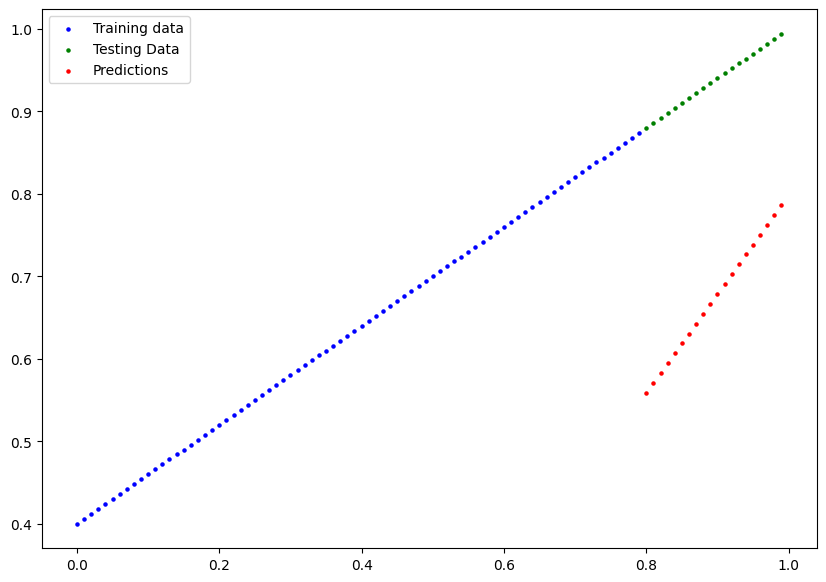

In [114]:
# y_pred.detach().numpy()
plot_predictions(predictions = y_preds)

In [115]:
list(model_0.parameters())

[Parameter containing:
 tensor([1.1982], requires_grad=True),
 Parameter containing:
 tensor([-0.3998], requires_grad=True)]

In [116]:
model_0.state_dict()

OrderedDict([('weight', tensor([1.1982])), ('bias', tensor([-0.3998]))])

In [117]:
## Setting The Loss Functions
loss_fn = nn.L1Loss()


## Setting the Optimisers
optimiser = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)

In [133]:
## Training LOOP
epochs = 400

for epoch in range(epochs):
  # ste model to training mode
  model_0.train()

  #forward pass
  y_pred = model_0(X_train)

  #calculate the Loss
  loss = loss_fn(y_pred , y_train)

  # optimiser zero grad
  optimiser.zero_grad()

  #perform the backpropogation in the loss wrt parameter of the model
  loss.backward()

  #step the optimiser(perform gradient descent)
  optimiser.step()


  ## Testing Loop
  model_0.eval()

  with torch.inference_mode():
    # do the forward pass for testing data
    test_pred = model_0(X_test)
    #calculate the loss
    test_loss = loss_fn(test_pred , y_test)

  if(epoch % 20 == 0):
    print(f"epoch : {epoch} | loss : {loss} | Test_Loss : {test_loss}")



  # print(loss)
  # print(model_0.state_dict())

epoch : 0 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch : 20 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch : 40 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch : 60 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch : 80 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch : 100 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch : 120 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch : 140 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch : 160 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch : 180 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch : 200 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch : 220 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch : 240 | loss : 0.005154062993824482 | Test_Loss : 0.004609152674674988
epoch

In [128]:
 with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [120]:
model_0.state_dict()#initial random paramerter wihtod  training loop

OrderedDict([('weight', tensor([0.7654])), ('bias', tensor([0.3304]))])

In [129]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6075])), ('bias', tensor([0.4022]))])

In [121]:
weight ,bias # original params

(0.6, 0.4)

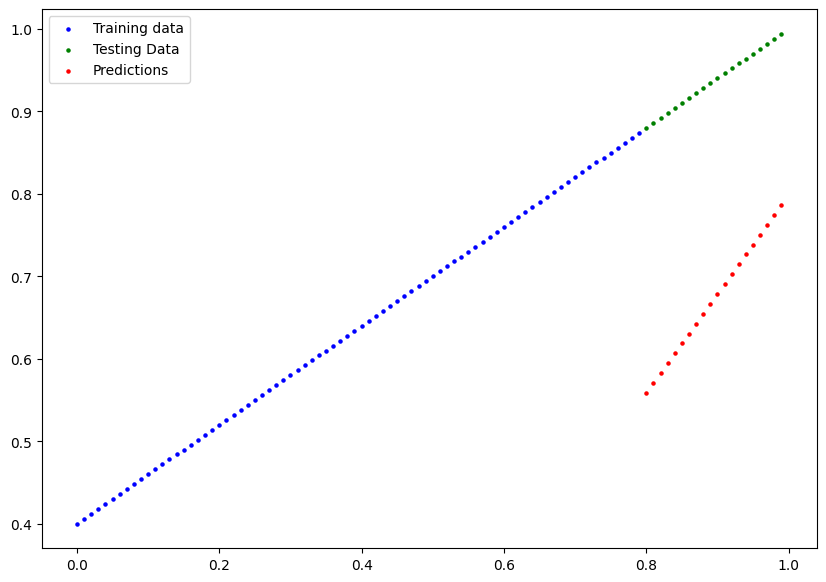

In [130]:
plot_predictions(predictions=y_preds)

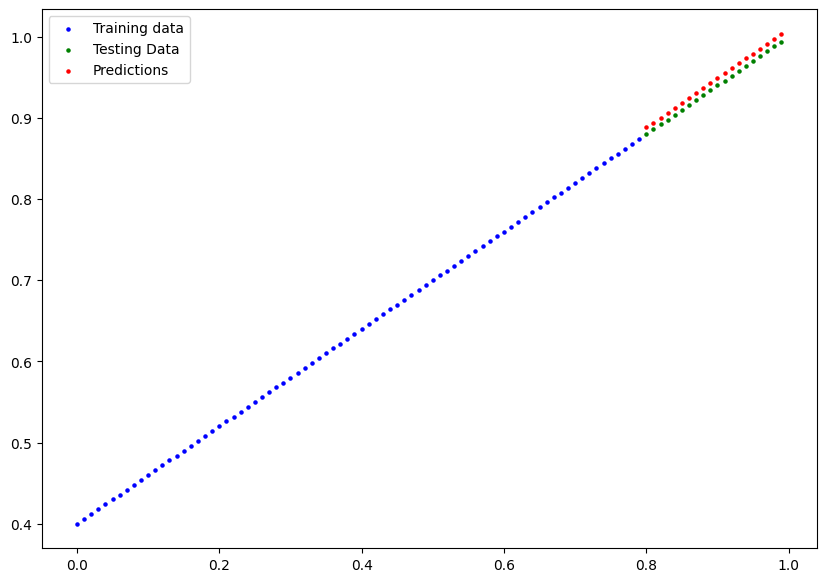

In [131]:
plot_predictions(predictions=y_preds_new)